In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from scipy.stats import gaussian_kde
#import mpl_scatter_density
import calendar

In [2]:
year=input('Year = ')

Year =  2020


In [3]:
def percentage_above_threshold(series, threshold):
    above_threshold = series[series >= threshold]
    return (above_threshold.count() / series.count()) * 100

In [4]:
df = pd.read_csv(f'{year}/scinti_S4cGPS{year}.csv', index_col=0, low_memory=False)

# Convert date and time columns to datetime format
df['DateTime_UTC'] = pd.to_datetime(df['DateTime_UTC'])
df['DateTime_IST'] = pd.to_datetime(df['DateTime_IST'])

# Set DateTime_UTC as the index
df.set_index('DateTime_UTC', inplace=True)

# Convert Total_S4_Sig1 column to float
df['Total_S4_Sig1'] = df['Total_S4_Sig1'].astype(float)
df['S4cor'] = df['S4cor'].astype(float)

df=df[df.index.time>=dt.time(12, 30, 0)]



In [5]:
grouped_data = df.groupby(pd.Grouper(freq='D'))


In [6]:
threshold=0.3

In [7]:
result = grouped_data['S4cor'].apply(percentage_above_threshold, threshold=threshold)


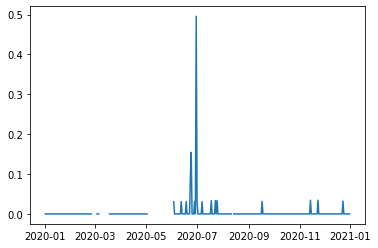

In [8]:
plt.plot(result)

In [9]:
result.to_csv(f'{year}/percent_year{year}.csv')